In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [85]:
data = pd.read_csv("course_lead_scoring.csv")
data.head().T

,0,1,2,3,4
lead_source,paid_ads,social_media,events,paid_ads,referral
industry,NaN,retail,healthcare,retail,education
number_of_courses_viewed,1,1,5,2,3
annual_income,79450.0,46992.0,78796.0,83843.0,85012.0
employment_status,unemployed,employed,unemployed,NaN,self_employed
location,south_america,south_america,australia,australia,europe
interaction_count,4,1,3,1,3
lead_score,0.94,0.8,0.69,0.87,0.62
converted,1,0,1,0,1


In [86]:
data.columns = data.columns.str.lower().str.replace(" ","_")
columns_object = list(data.dtypes[data.dtypes == "object"].index)

columns_object

['lead_source', 'industry', 'employment_status', 'location']

In [87]:
for i in columns_object:
    data[i] = data[i].str.lower().str.replace(" ","_")
    

In [88]:
data

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
...,...,...,...,...,...,...,...,...,...
1457,referral,manufacturing,1,NaN,self_employed,north_america,4,0.53,1
1458,referral,technology,3,65259.0,student,europe,2,0.24,1
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1
1460,referral,NaN,5,71016.0,self_employed,north_america,0,0.25,1


In [89]:
data.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [90]:
data["annual_income"] = data["annual_income"].fillna(0)

for i in columns_object:
    data[[i]] = data[[i]].fillna("NA").astype(str)
    print(data[i].unique())

['paid_ads' 'social_media' 'events' 'referral' 'organic_search' 'NA']
['NA' 'retail' 'healthcare' 'education' 'manufacturing' 'technology'
 'other' 'finance']
['unemployed' 'employed' 'NA' 'self_employed' 'student']
['south_america' 'australia' 'europe' 'africa' 'middle_east' 'NA'
 'north_america' 'asia']


In [91]:
for col in columns_object:
    tipos = data[col].apply(type).value_counts()
    print(f"\nTipos en '{col}':\n{tipos}")



Tipos en 'lead_source':
lead_source
<class 'str'>    1462
Name: count, dtype: int64

Tipos en 'industry':
industry
<class 'str'>    1462
Name: count, dtype: int64

Tipos en 'employment_status':
employment_status
<class 'str'>    1462
Name: count, dtype: int64

Tipos en 'location':
location
<class 'str'>    1462
Name: count, dtype: int64


In [92]:
data.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

In [93]:
data["industry"].mode()

0    retail
Name: industry, dtype: object

In [94]:
data.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [95]:
data_correlation = data[["number_of_courses_viewed","annual_income","interaction_count","lead_score"]]
data_correlation

,number_of_courses_viewed,annual_income,interaction_count,lead_score
0,1,79450.0,4,0.94
1,1,46992.0,1,0.80
2,5,78796.0,3,0.69
3,2,83843.0,1,0.87
4,3,85012.0,3,0.62
...,...,...,...,...
1457,1,0.0,4,0.53
1458,3,65259.0,2,0.24
1459,1,45688.0,3,0.02
1460,5,71016.0,0,0.25


In [96]:
correlation_matrix = data_correlation.corr()
print(correlation_matrix)

                          number_of_courses_viewed  annual_income  \
number_of_courses_viewed                  1.000000       0.009770   
annual_income                             0.009770       1.000000   
interaction_count                        -0.023565       0.027036   
lead_score                               -0.004879       0.015610   

                          interaction_count  lead_score  
number_of_courses_viewed          -0.023565   -0.004879  
annual_income                      0.027036    0.015610  
interaction_count                  1.000000    0.009888  
lead_score                         0.009888    1.000000  


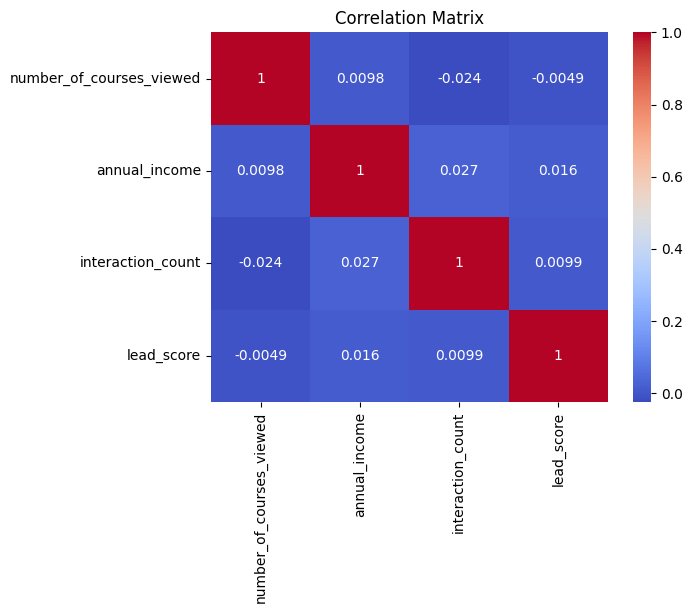

In [97]:
sns.heatmap(correlation_matrix,annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [119]:
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(data, test_size= 0.2,random_state=42)


In [120]:
df_train,df_val=train_test_split(df_train_full,test_size=0.25, random_state=42)

In [121]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [122]:
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

In [123]:
del(df_train["converted"])
del(df_val["converted"])
del(df_test["converted"])

In [124]:
from sklearn.metrics import mutual_info_score
scores = [ mutual_info_score(df_train[i],y_train) for i in columns_object]
for i, j in zip(columns_object,scores):
    print(f'{i}, valor: {round(j,2)} ')




lead_source, valor: 0.04 
industry, valor: 0.01 
employment_status, valor: 0.01 
location, valor: 0.0 


In [130]:
from sklearn.feature_extraction import DictVectorizer

In [132]:
dv = DictVectorizer()

In [163]:
train_dicts = df_train[['lead_source', 'industry', 'employment_status', 'location']].to_dict(orient="records")
test_dicts = df_test[['lead_source', 'industry', 'employment_status', 'location']].to_dict(orient="records")
val_dicts = df_val[['lead_source', 'industry', 'employment_status', 'location']].to_dict(orient="records")
X_train = dv.fit_transform(train_dicts)
X_test = dv.transform(test_dicts)
X_val = dv.transform(val_dicts)

In [164]:
X_train.shape, X_test.shape, X_val.shape

((876, 27), (293, 27), (293, 27))

In [ ]:
from sklearn.linear_model import LogisticRegression


In [165]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [166]:
model.coef_[0].round(2)

array([-0.26,  0.44,  0.27,  0.35, -0.45, -0.43,  0.97, -0.23,  0.14,
        0.07, -0.02, -0.13, -0.02,  0.46, -0.05,  0.05, -0.94,  1.02,
       -0.19,  0.23,  0.  , -0.02,  0.03,  0.37,  0.26, -0.17, -0.35])

In [167]:
y_pred= model.predict_proba(X_val)[:,1]

In [184]:


converted_prediction = (y_pred >=0.5)

accu = (y_val == converted_prediction).mean()

print(round(accu,2))

0.61


In [180]:
featured = ['industry','employment_status','lead_score']
for i in featured:
    reduced_train = df_train.drop(columns=[i])
    reduced_val = df_val.drop(columns=[i])
    
    train_r_dicts = reduced_train.to_dict(orient="records")
    val_r_dicts = reduced_val.to_dict(orient="records")
    dv_r = DictVectorizer()
    X_train_r = dv_r.fit_transform(train_r_dicts)
    X_val_r = dv.transform(val_r_dicts)
    
    model_r = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model_r.fit(X_train_r,y_train)
    y_pred_r= model.predict_proba(X_val_r)[:,1]
    
    converted_prediction_r = (y_pred_r >=0.5)
    accu_r = (y_val == converted_prediction_r).mean()
    print(f"Sin '{i}': accuracy = {accu_r:.2f}, diferencia = {accu - accu_r:.4f}")


Sin 'industry': accuracy = 0.60, diferencia = 0.0034
Sin 'employment_status': accuracy = 0.56, diferencia = 0.0512
Sin 'lead_score': accuracy = 0.61, diferencia = 0.0000


In [192]:
c_values =  [0.01, 0.1, 1, 10, 100]
accu = []
for c in c_values:
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    model.fit(X_train,y_train)
    y_pred = model.predict_proba(X_val)[:,1]
    predi = (y_pred >= 0.5)
    acc = (y_val == predi).mean()
    accu.append(acc)

for i,j in zip(c_values,accu):
    print(f'c value: {i}, accu = {round(j,3)}')



c value: 0.01, accu = 0.56
c value: 0.1, accu = 0.601
c value: 1, accu = 0.608
c value: 10, accu = 0.604
c value: 100, accu = 0.604
